<a href="https://colab.research.google.com/github/chirag300/DataScience/blob/main/22-01-24-KNN/Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



**KNN is a supervised machine learning algorithm.It can be used to classification of data set.Here The dataset contains the Age,salary and the decision to purchase a particular Car.We will be use kNN to predict if a particular person will buy a car.**

**Import Important Library**

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Importing the Python Modules**

In [34]:
#import pyplot and seaborn

plt.style.use('fivethirtyeight')

**2.Exploring the Data**

import and read data

In [35]:
df = pd.read_csv('https://raw.githubusercontent.com/Diwakar-Gupta/LrcDataScience/main/22-01-24-KNN/Social_Network_Ads.csv')

In [ ]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


So we have the User ID, Gender,Age,Salary and the data if Purchase made by a used.

**Summary of Dataset**

print and see summary of the data set

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


Rows     : 400
Columns  : 5

Features :
     : ['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased']

Missing values    : 0

Unique values :  
 User ID            400
Gender               2
Age                 43
EstimatedSalary    117
Purchased            2
dtype: int64


describe your data set 

In [ ]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


,count,mean,std,min,25%,50%,75%,max
User ID,400.0,1.569154e+07,71658.321581,15566689.0,15626763.75,15694341.5,15750363.0,15815236.0
Age,400.0,3.765500e+01,10.482877,18.0,29.75,37.0,46.0,60.0
EstimatedSalary,400.0,6.974250e+04,34096.960282,15000.0,43000.00,70000.0,88000.0,150000.0
Purchased,400.0,3.575000e-01,0.479864,0.0,0.00,0.0,1.0,1.0


What the inside you get : 

**Gender**

try to plot this visulization ,

you can refer solution sheet , or

you can plot pie plot and count plot individualy and visualize data

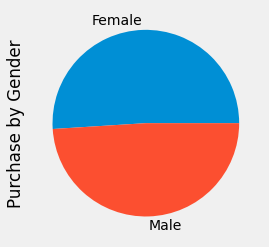

In [ ]:

df.groupby('Gender').size().plot(kind='pie', label = 'Purchase by Gender')



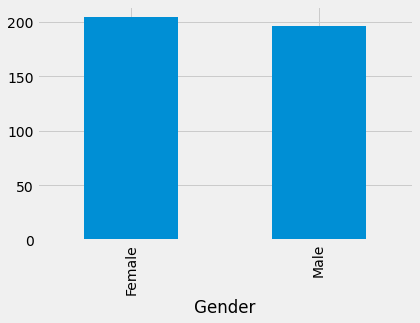

In [ ]:
df.groupby('Gender').size().plot(kind='bar', label = 'Purchase by Gender', )

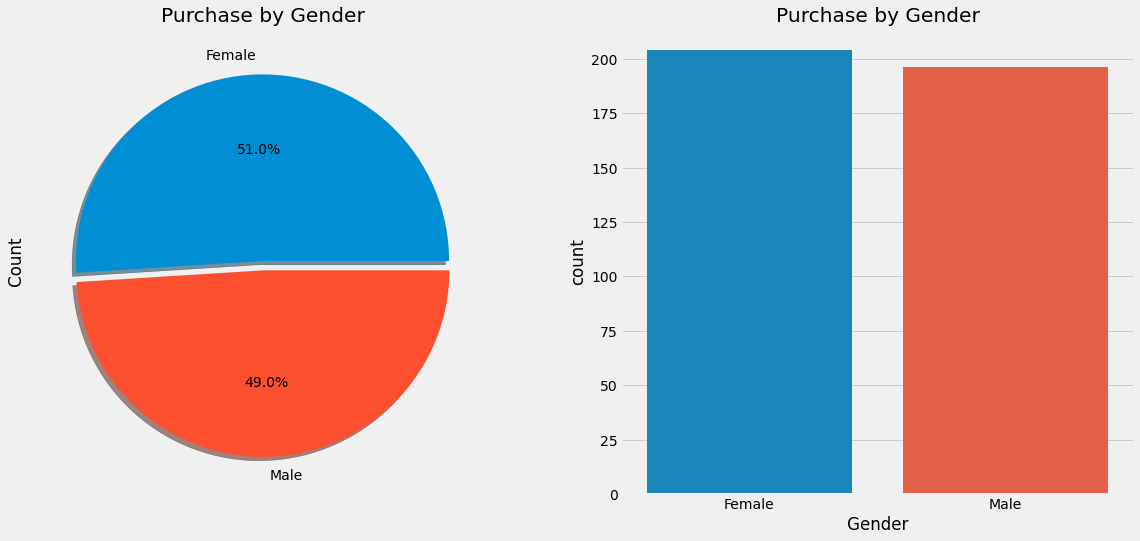

Inside : 

**Purchase Distribution**

try to plot this visulization ,

you can refer solution sheet , or

you can plot pie plot and count plot individualy and visualize data

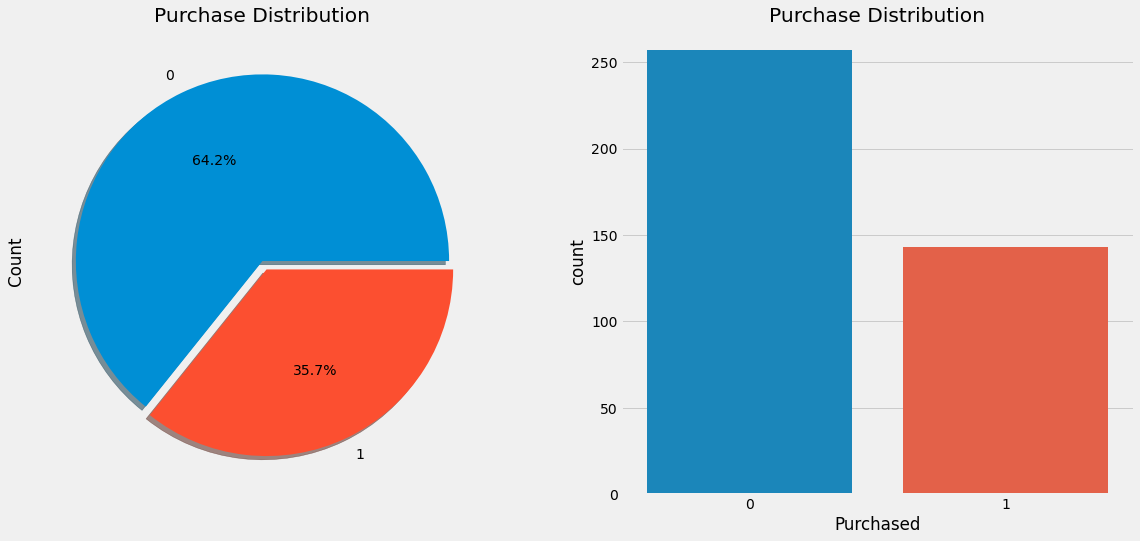

Ans : 

**Estimated Salary Distribution**

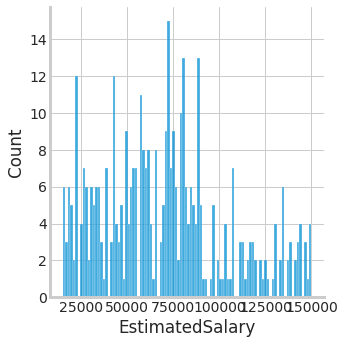

In [ ]:
#use distplot
sns.set_style('whitegrid')
sns.displot(df.EstimatedSalary, bins = 100, )

In [36]:
Gender = pd.get_dummies(df['Gender'], drop_first = True)
df = pd.concat([df, Gender], axis = 1)

Ans : 

**3.Generating Array of Features and Target Values**

In [37]:
# seprate target and feature
X= df.drop(['Purchased','Gender'], axis = 1)
Y=df.Purchased
X

,User ID,Age,EstimatedSalary,Male
0,15624510,19,19000,1
1,15810944,35,20000,1
2,15668575,26,43000,0
3,15603246,27,57000,0
4,15804002,19,76000,1
...,...,...,...,...
395,15691863,46,41000,0
396,15706071,51,23000,1
397,15654296,50,20000,0
398,15755018,36,33000,1


**4.Splitting the dataset to Train and Test Set**

In [38]:
# split the data set into training and testing part, take test_size value 0.2
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y)

**5.Feature Scaling**

In [22]:
#You can use standardscale for scaling the feature
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

**6.Fitting K Neighbors into Training set**

In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

skmodel = KNeighborsClassifier()
skmodel.fit(x_train, y_train)


KNeighborsClassifier()

In [24]:
y_pred = skmodel.predict(x_test)

**7.Predicting the test set results**

In [25]:
# predict the score on X_test and store in y_pred variable 
accuracy_score(y_test, skmodel.predict(x_test))

0.68

**8.Making the confusion matrix**

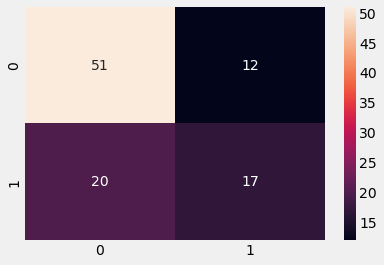

In [26]:
from sklearn.metrics import confusion_matrix  , classification_report, accuracy_score
# plot heatmap using sns you can refer previous assignment solution , at the last you can refer solution 
# don't worry if you are not able to visualize exact plot
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True)

In [27]:
# print classification report using classification_report(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.81      0.76        63
           1       0.59      0.46      0.52        37

    accuracy                           0.68       100
   macro avg       0.65      0.63      0.64       100
weighted avg       0.67      0.68      0.67       100



In [15]:
#using accuracy_score print your model accuracy 
accuracy_score(y_test, skmodel.predict(x_test))

0.73

0.925


Correct predictions =55+19=74

Wrong predictions =3+3=6

Accuracy = (74/80)*100 =92.5 %

**9.Visualizing the Training Set Results**

In [ ]:
from matplotlib.colors import ListedColormap
X_set,y_set=x_test,y_test
X1,X2=np.meshgrid(np.arange(start=X_set[:,0].min()-1,stop=X_set[:,0].max()+1,step=0.01),
                 np.arange(start=X_set[:,1].min()-1,stop=X_set[:,1].max()+1,step=0.01))
plt.contourf(X1,X2,classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
            alpha=0.75,cmap=ListedColormap(('red','green')))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set==j,0],X_set[y_set==j,1],
               c=ListedColormap(('red','green'))(i),label=j)
plt.title('K-NN (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

**10.Visualizing the Test Set Results**

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


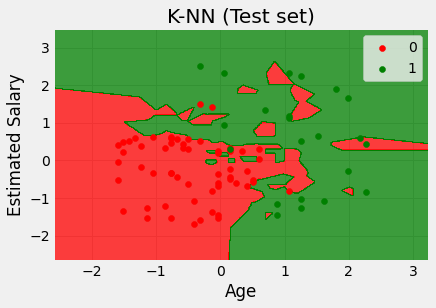

In [ ]:
from matplotlib.colors import ListedColormap
X_set,y_set=X_test,y_test
X1,X2=np.meshgrid(np.arange(start=X_set[:,0].min()-1,stop=X_set[:,0].max()+1,step=0.01),
                 np.arange(start=X_set[:,1].min()-1,stop=X_set[:,1].max()+1,step=0.01))
plt.contourf(X1,X2,classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
            alpha=0.75,cmap=ListedColormap(('red','green')))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set==j,0],X_set[y_set==j,1],
               c=ListedColormap(('red','green'))(i),label=j)
plt.title('K-NN (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

Red area represent the people who didnt buy the car.Green area represent people who brought the car.We can see that the accuracy level obtained is greater than thats we might have obtained by other Algorithms like Logistic Regression.

**How to decide Optimium Value of K?**

In [28]:
error_rate=[]

for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i=knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

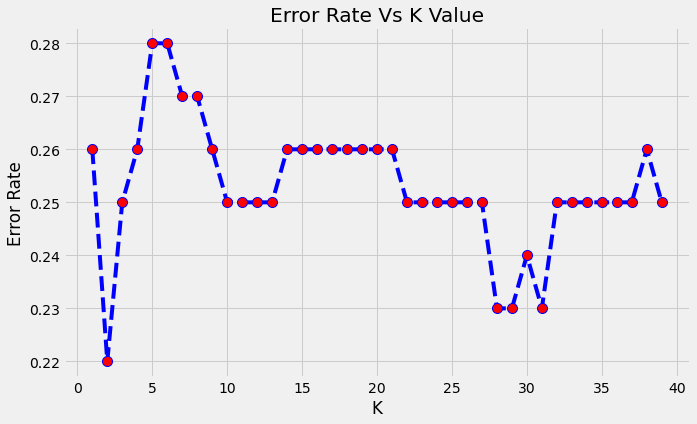

In [17]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('Error Rate Vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

From the above plot we can see that lowest Error rate is when  K has a value of 5.Let us run model with K=5 and check the performace of the model

**Model with K=5**

In [39]:
# again train your model on these parameter n_neighbors=5,metric='minkowski',p=2
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

skmodel = KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
skmodel.fit(x_train, y_train)

KNeighborsClassifier()

KNeighborsClassifier()

In [40]:
# predict the score using on X_test and store into y_pred
y_pred = skmodel.predict(x_test)

**Model Performance with K=5**

Confusion Matrix with K=5

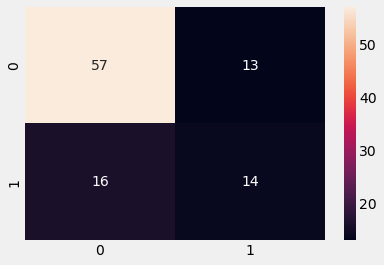

In [41]:
#frm sklearn.metrics import confusion_matrix  , classification_report and accuracy_score
# plot heatmap using sns you can refer previous assignment solution , at the last you can refer solution 
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True)

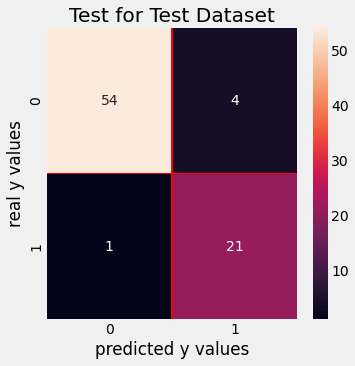

In [42]:
# show classification_report 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.81      0.80        70
           1       0.52      0.47      0.49        30

    accuracy                           0.71       100
   macro avg       0.65      0.64      0.64       100
weighted avg       0.70      0.71      0.71       100



              precision    recall  f1-score   support

           0       0.98      0.93      0.96        58
           1       0.84      0.95      0.89        22

    accuracy                           0.94        80
   macro avg       0.91      0.94      0.92        80
weighted avg       0.94      0.94      0.94        80



In [43]:
# print accuracy score 
accuracy_score(y_test, skmodel.predict(x_test))

0.71

0.9375


So we can see that when we increased the K number from 1 to 5 the accuracy,Precision and Recall of the model have improved.